In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("input/Churn_Modelling.xlsx")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 資料清洗
1. 確定哪些資料是無意義 (unique = 1)
2. 清除不必要資料 "RowNumber" , "CustomerId" , "Surname"
3. 將物件項目 (object) 轉換 encode to (int)

In [2]:
# checking the percentage unique 
for col in data.columns :
    print(" col_name : " , col , " unique percentage : " , len(data[col].unique())/len(data))

 col_name :  RowNumber  unique percentage :  1.0
 col_name :  CustomerId  unique percentage :  1.0
 col_name :  Surname  unique percentage :  0.2932
 col_name :  CreditScore  unique percentage :  0.046
 col_name :  Geography  unique percentage :  0.0003
 col_name :  Gender  unique percentage :  0.0002
 col_name :  Age  unique percentage :  0.007
 col_name :  Tenure  unique percentage :  0.0011
 col_name :  Balance  unique percentage :  0.6382
 col_name :  NumOfProducts  unique percentage :  0.0004
 col_name :  HasCrCard  unique percentage :  0.0002
 col_name :  IsActiveMember  unique percentage :  0.0002
 col_name :  EstimatedSalary  unique percentage :  0.9999
 col_name :  Exited  unique percentage :  0.0002


In [3]:
# deleting RowNumber , CustomerId and Surname 
data = data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Label encode the Object Datatypes 
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# one hot encode geography 
# optional 

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()

#values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]

data = data.drop(["Geography"] , axis = 1)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [7]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [8]:
# Feature and Target vector

X = data[remaining_columns].values 
Y = data['Exited'].values.astype(np.uint8)

In [9]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [10]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

## 正規化 check whether data is standardized (mean should be 1)

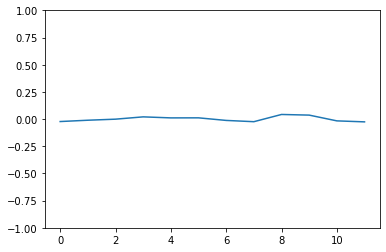

In [11]:
plt.ylim(-1,1)
means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

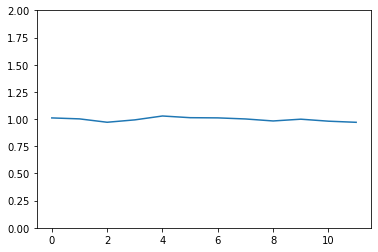

In [12]:
# Check variances 
plt.ylim(0,2)
vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

## LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(Xtrain , Ytrain)
predictions = model.predict(Xtest)

In [14]:
# Model Accuracy Score 準確率 

def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

In [15]:
Accuracy(Ytest , predictions)

0.8215

## Confusion Matrix 混淆矩陣

Confusion Matrix 是用來評估模型好壞常見的方法。他還可以用來加以計算Accuracy, Precision, Recell, F值等衡量指標。在不同情況可能會對不同指標感興趣。從中導入混淆(confusion)、度量(metrics)、準確度(accuracy)、精確度(precision)、召回率(recall)。

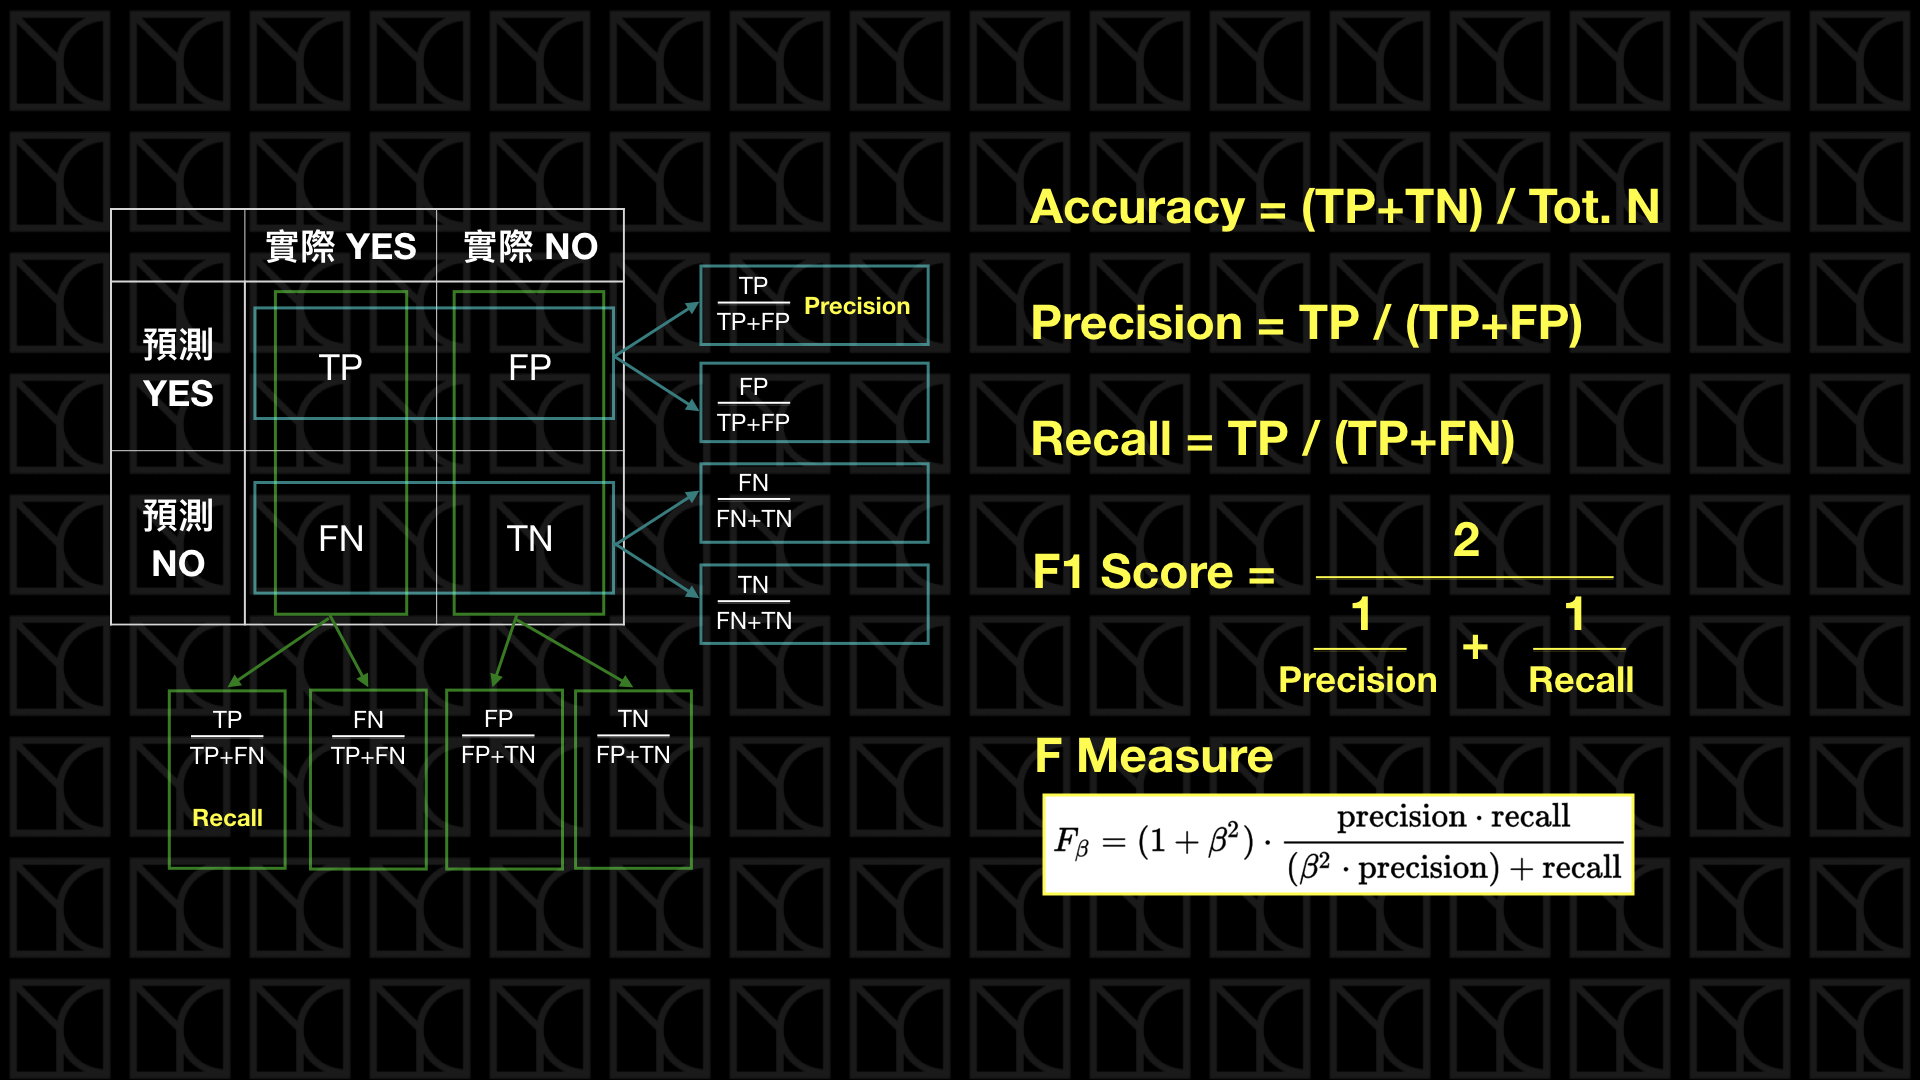

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

def precision(label, confusion_matrix):  #精確度
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):     #召回率
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def f1_score(precision , recall):        # (精確度*召回率) / (精確度+召回率)
    return 2 * (precision * recall)/(precision + recall)

<AxesSubplot:>

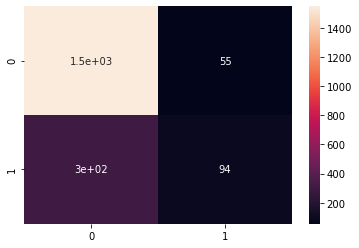

In [17]:
matrix = confusion_matrix(Ytest , predictions)
sns.heatmap(matrix , annot=True)

In [18]:
precision(1 , matrix) , recall(1 , matrix)
# 精度為 0.63，召回為 0.23
# 大部分的零被歸為零，但大多數的歸零，這清楚地看到我們的模型非常偏向於零。

(0.6308724832214765, 0.23737373737373738)

In [19]:
print(f'Accuracy Score: {accuracy_score(Ytest,predictions)}')
print(f'Confusion Matrix: \n{confusion_matrix(Ytest, predictions)}')
print(f'Area Under Curve: {roc_auc_score(Ytest, predictions)}')
print(f'Recall score: {recall_score(Ytest,predictions)}')

Accuracy Score: 0.8215
Confusion Matrix: 
[[1549   55]
 [ 302   94]]
Area Under Curve: 0.6015422302828787
Recall score: 0.23737373737373738


##  find a way to increase our recall.
利用 Weighting Labels (class weight) 優先處理少數樣本來處理不平衡

In [20]:
# count the number of 0 and 1
# 10,000 total samples, 7963 samples are zero

value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [21]:
for key , value in value_counts.items():
    value_counts[key] = value/len(data)

print(value_counts)

{0: 0.7963, 1: 0.2037}


In [22]:
class_weights = {}

for key , value in value_counts.items():
    class_weights[key] = sum(value_counts.values()) - value / sum(value_counts.values())

class_weights

{0: 0.2037, 1: 0.7963}

In [23]:
class_weights = {0 : 20.37 , 1 : 79.73}

In [24]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(class_weight=class_weights)  #將 class 作為 LogisticRegression 的參數訓練我們的model
model.fit(Xtrain , Ytrain)
predictions = model.predict(Xtest)

In [25]:
Accuracy(Ytest , predictions) 
#準確度(accuracy)從 0.63 -> 0.70

0.7015

<AxesSubplot:>

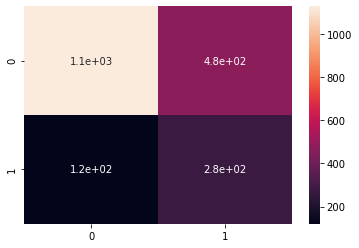

In [26]:
import seaborn as sns 

matrix = confusion_matrix(Ytest , predictions)
sns.heatmap(matrix , annot=True)

In [27]:
precision(1 , matrix) , recall(1 , matrix)

(0.3665338645418327, 0.696969696969697)

In [28]:
'''
我們已將召回率提高到三倍，但精度略有下降
原先精確度(precision)、召回率(recall)為
(0.6308724832214765, 0.23737373737373738)
'''

print(f'Accuracy Score: {accuracy_score(Ytest,predictions)}')
print(f'Confusion Matrix: \n{confusion_matrix(Ytest, predictions)}')
print(f'Area Under Curve: {roc_auc_score(Ytest, predictions)}')
print(f'Recall score: {recall_score(Ytest,predictions)}')

Accuracy Score: 0.7015
Confusion Matrix: 
[[1127  477]
 [ 120  276]]
Area Under Curve: 0.6997940754175168
Recall score: 0.696969696969697


## Confusion Matrix 混淆矩陣 的延伸 ROC AUC

- ROC曲線：接收者操作特徵曲線(receiver operating characteristic curve)
- AUC (Area Under Curve) 被定義為ROC曲線下的面積

In [29]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(Xtrain , Ytrain)

predictions = model.predict(Xtest)
pred_probs = model.predict_proba(Xtest)
# sample probabilities 
pred_probs[:3]

array([[0.78851495, 0.21148505],
       [0.85005476, 0.14994524],
       [0.89806886, 0.10193114]])

In [30]:
# Get the probs of only Churn = "1"
pred_probs = pred_probs[:, 1]

[[1549   55]
 [ 302   94]]


<AxesSubplot:>

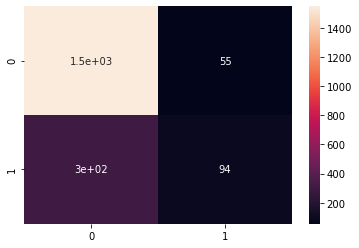

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,\
                            recall_score,roc_curve,roc_auc_score

matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [32]:
def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : " , Accuracy(Ytest , predictions))
print("Precision : " , precision_score(Ytest , predictions))
print("Precision : " , recall_score(Ytest , predictions))

Validation Accuracy :  0.8215
Precision :  0.6308724832214765
Precision :  0.23737373737373738


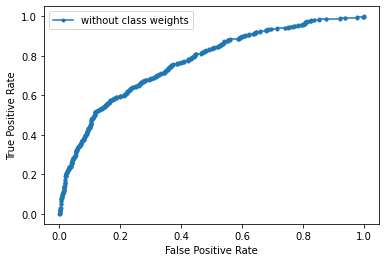

In [33]:
Fpr, Tpr, _ = roc_curve(Ytest, pred_probs)

plt.plot(Fpr, Tpr, marker='.', label='without class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
Auc = roc_auc_score(Ytest, pred_probs)
print(" Area Under Curve : " , Auc)

 Area Under Curve :  0.770071349404267


**Applying Class Weights**

find a way to increase our recall. 
利用 Weighting Labels (class weight) 優先處理少數樣本來處理不平衡

In [35]:
# finding class weights 

value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [36]:
class_weights = {0 : 20.37 , 1 : 79.63}

In [37]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(class_weight=class_weights)
model.fit(Xtrain , Ytrain)
predictions = model.predict(Xtest)
pred_probs = model.predict_proba(Xtest)

[[1128  476]
 [ 120  276]]


<AxesSubplot:>

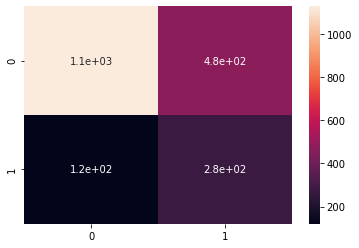

In [38]:
# Get the probs of only Churn = "1"
pred_probs = pred_probs[:, 1]
matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [39]:
def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : " , Accuracy(Ytest , predictions))
print("Precision : " , precision_score(Ytest , predictions))
print("Precision : " , recall_score(Ytest , predictions))

Validation Accuracy :  0.702
Precision :  0.3670212765957447
Precision :  0.696969696969697


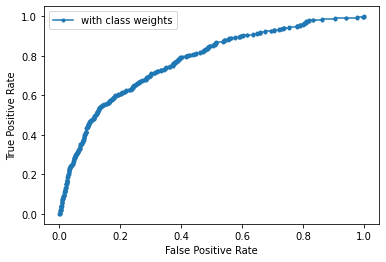

In [40]:
Fpr, Tpr, _ = roc_curve(Ytest, pred_probs)

plt.plot(Fpr, Tpr, marker='.', label='with class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [41]:
Auc = roc_auc_score(Ytest, pred_probs)
print(" Area Under Curve : " , Auc)

 Area Under Curve :  0.7736104813723268
